In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('rock_density_xray.csv')
print(df.shape)
df.head()

(300, 2)


,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [3]:
# changing columns names
df.columns = ['Signal', 'Density']
df.tail()

,Signal,Density
295,0.700227,2.112965
296,58.586585,2.000293
297,54.674548,1.879181
298,15.162434,2.644990
299,38.020267,2.044287


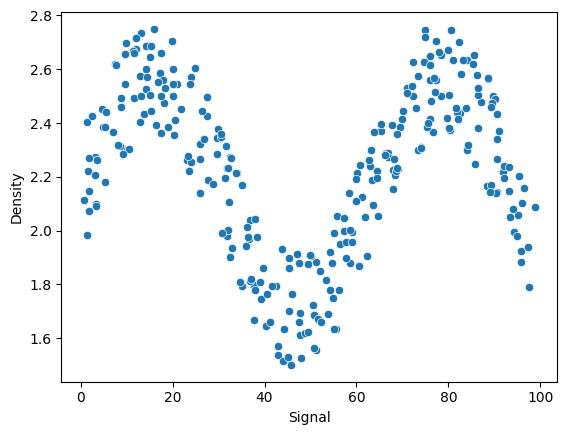

In [4]:
sns.scatterplot(x ='Signal', y ='Density', data=df);

In [5]:
X = df['Signal'].values.reshape(-1, 1)
y = df['Density']

In [6]:
# Train and Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [7]:
# Create Model
# since we have only one feature we should reshape our data to (-1, 1) range
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [8]:
lr_preds = lr_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test, lr_preds) 
MSE = mean_squared_error(y_test, lr_preds) 
RMSE = np.sqrt(MSE)
print('MAE: ', MAE)
print('MSE: ', MSE)
print('RMSE: ', RMSE)
print('mean: ', y_test.mean())
print(lr_preds) # all the values are the same and that's not good(only returning mean)

MAE:  0.211198973318633
MSE:  0.06605167265148638
RMSE:  0.2570051996584629
mean:  2.267044999300512
[2.22029657 2.22047771 2.22035637 2.22034337 2.22039737 2.22050555
 2.22042659 2.22028877 2.22034673 2.22029714 2.22041506 2.22050153
 2.22043891 2.22042003 2.22047022 2.22032403 2.22033377 2.22030628
 2.22035154 2.22035373 2.22029266 2.22036798 2.22033018 2.22030611
 2.22042754 2.22044019 2.2204142  2.22040303 2.22048946 2.22047495]


In [9]:
singnal_range = np.arange(0, 100)
print(singnal_range)
signal_preds = lr_model.predict(singnal_range.reshape(-1, 1))
print(signal_preds)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[2.22028446 2.22028673 2.22028899 2.22029126 2.22029353 2.22029579
 2.22029806 2.22030032 2.22030259 2.22030485 2.22030712 2.22030938
 2.22031165 2.22031391 2.22031618 2.22031844 2.22032071 2.22032297
 2.22032524 2.2203275  2.22032977 2.22033204 2.2203343  2.22033657
 2.22033883 2.2203411  2.22034336 2.22034563 2.22034789 2.22035016
 2.22035242 2.22035469 2.22035695 2.22035922 2.22036148 2.22036375
 2.22036602 2.22036828 2.22037055 2.22037281 2.22037508 2.22037734
 2.22037961 2.22038187 2.22038414 2.2203864  2.22038867 2.22039093
 2.2203932  2.22039546 2.22039773 2.22039999 2.22040226 2.22040453
 2.22040679 2.22040906 2.22041132 2.22041359 2.22041585 2.22041812
 2.22042038 2.22042265 2

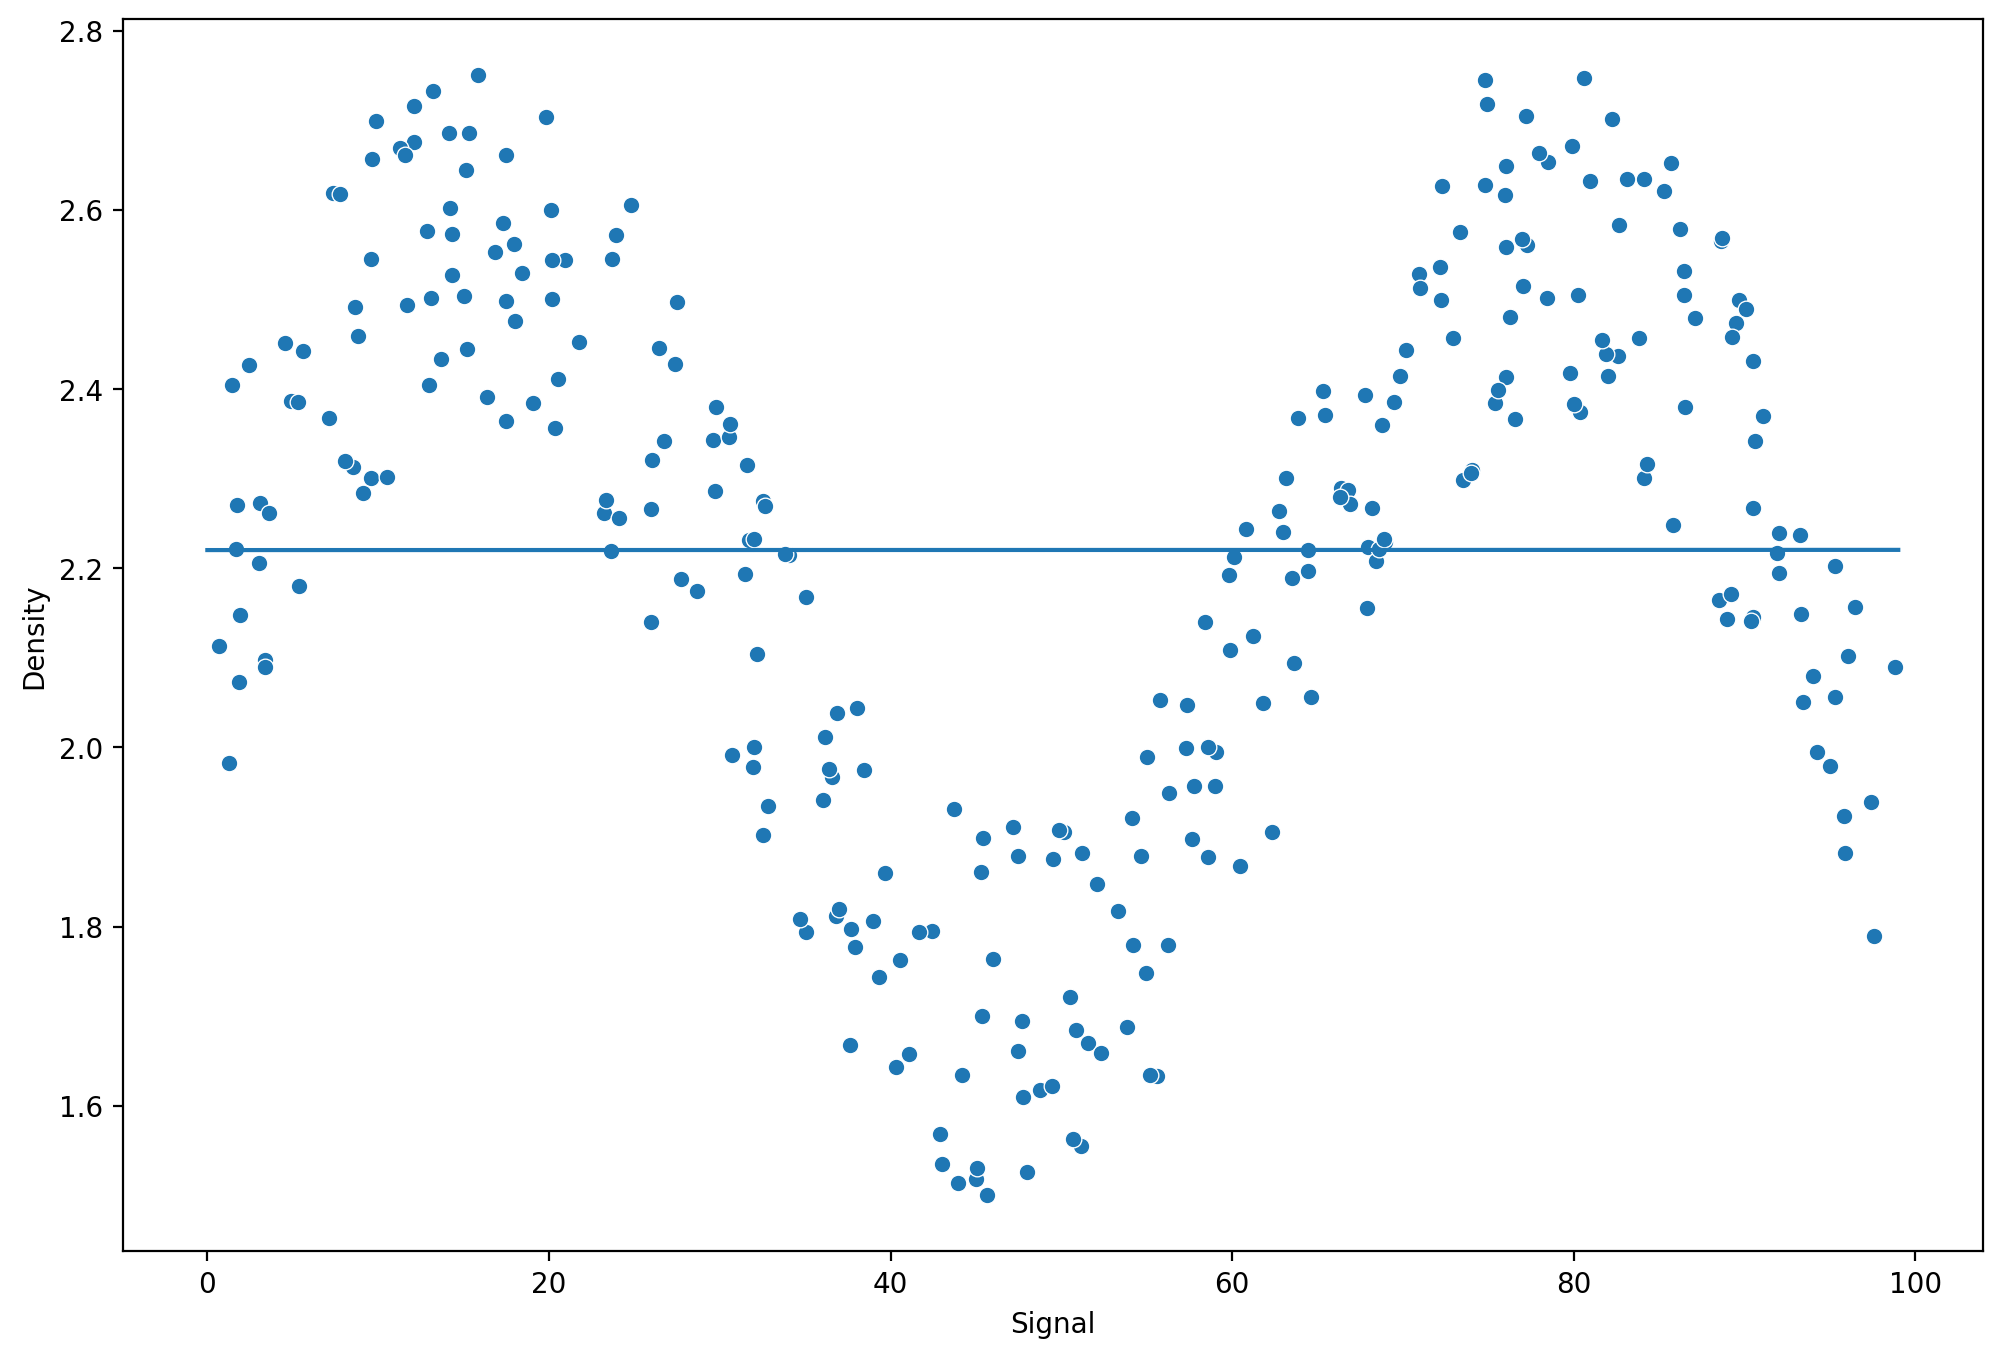

In [10]:
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(x = 'Signal', y ='Density', data=df);
plt.plot(singnal_range, signal_preds)

In [19]:
def run_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    preds = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    print(f'MAE: {mae}, RMSE: {rmse}')

    singnal_range = np.arange(0, 100)
    signal_preds = model.predict(singnal_range.reshape(-1, 1))

    plt.figure(figsize=(10, 8))
    sns.scatterplot(x = 'Signal', y ='Density', data=df, c='black');
    plt.plot(singnal_range, signal_preds, c = 'red');

MAE: 0.21119897331863288, RMSE: 0.25700519965846286


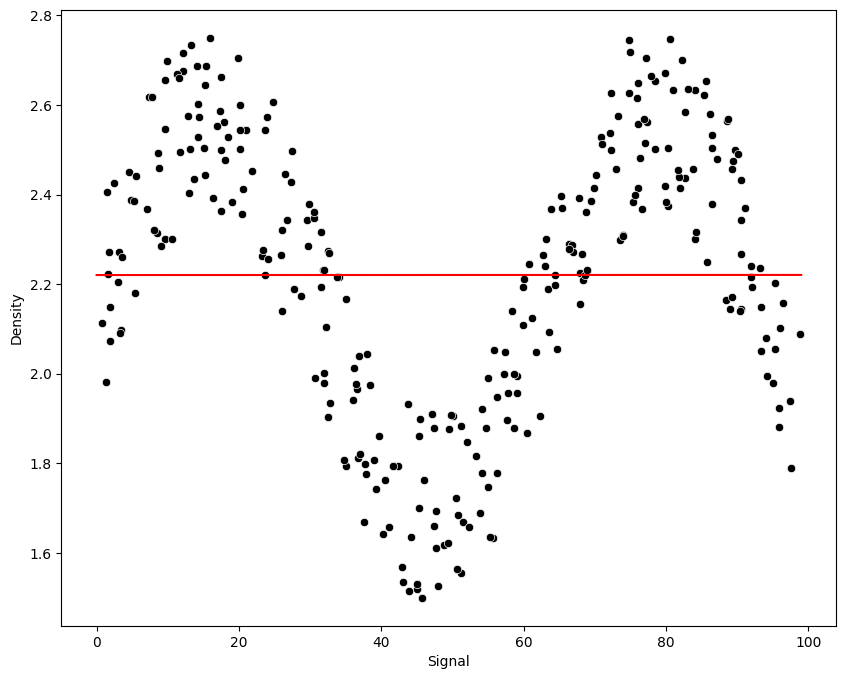

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

model = Pipeline([
    ('scaler', StandardScaler()),
    ('regr', LinearRegression())
])
run_model(model, X_train, y_train, X_test, y_test)

MAE: 0.1186431200782958, RMSE: 0.1445281308082368


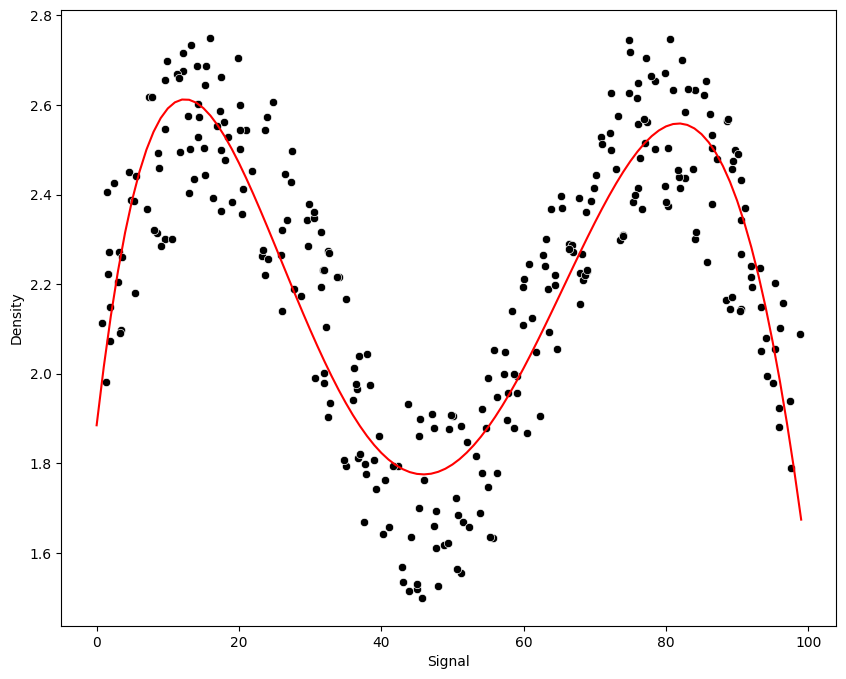

In [ ]:
# LinearRegresion didn't work out well
# let's try polynomial for it

from sklearn.preprocessing import PolynomialFeatures

model = Pipeline([
    ('poly', PolynomialFeatures(degree=5)),
    ('regr', LinearRegression())
])
run_model(model, X_train, y_train, X_test, y_test)

MAE: 0.11877297474442378, RMSE: 0.1523487028635337
MAE: 0.1570937980156112, RMSE: 0.19545005360281248
MAE: 0.11635971693292672, RMSE: 0.13277855732740926


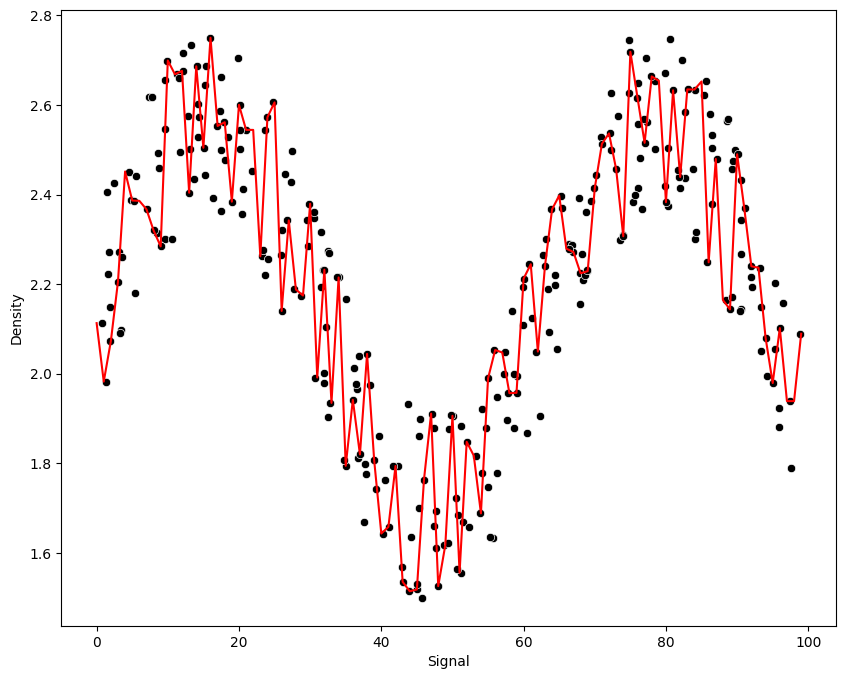

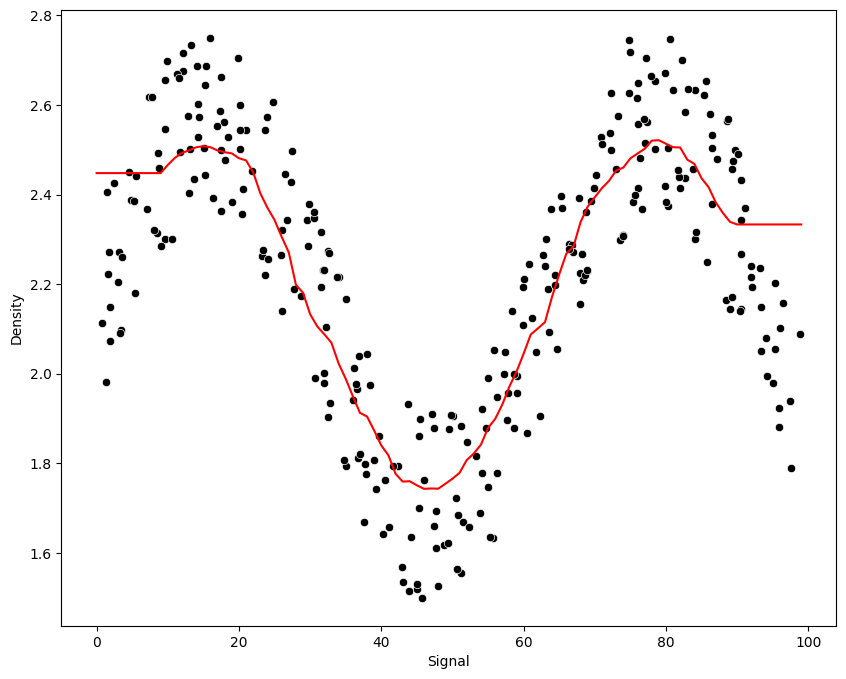

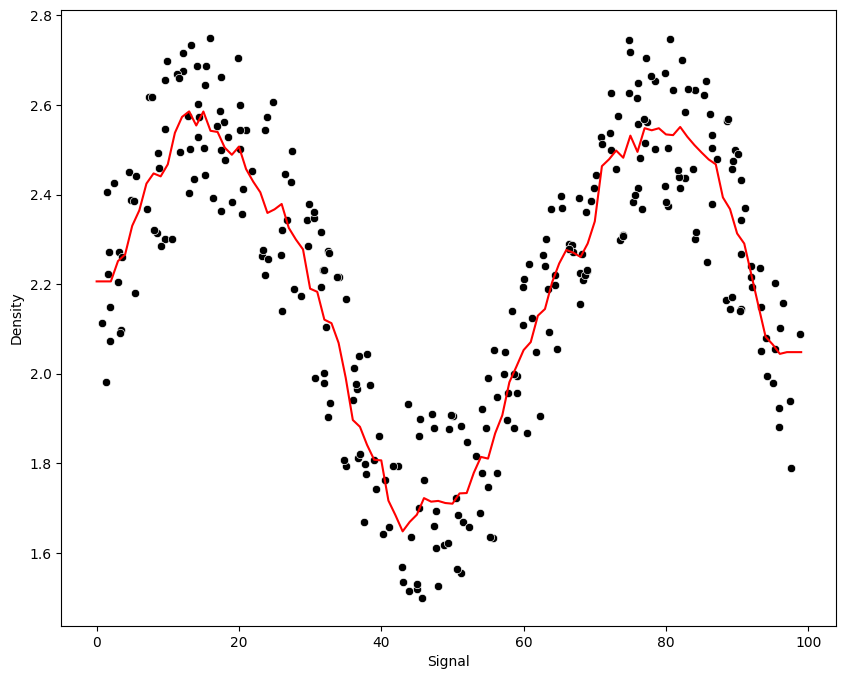

In [ ]:
# Polynomial didn't work out well
# let's use KNNregressor 

from sklearn.neighbors import KNeighborsRegressor

k_values = [1, 50, 10]


for n in k_values:
    model = Pipeline([
        ('scale', StandardScaler()),
        ('regr', KNeighborsRegressor(n_neighbors=n))
    ])
    run_model(model, X_train, y_train, X_test, y_test) 



MAE: 0.11877297474442378, RMSE: 0.1523487028635337


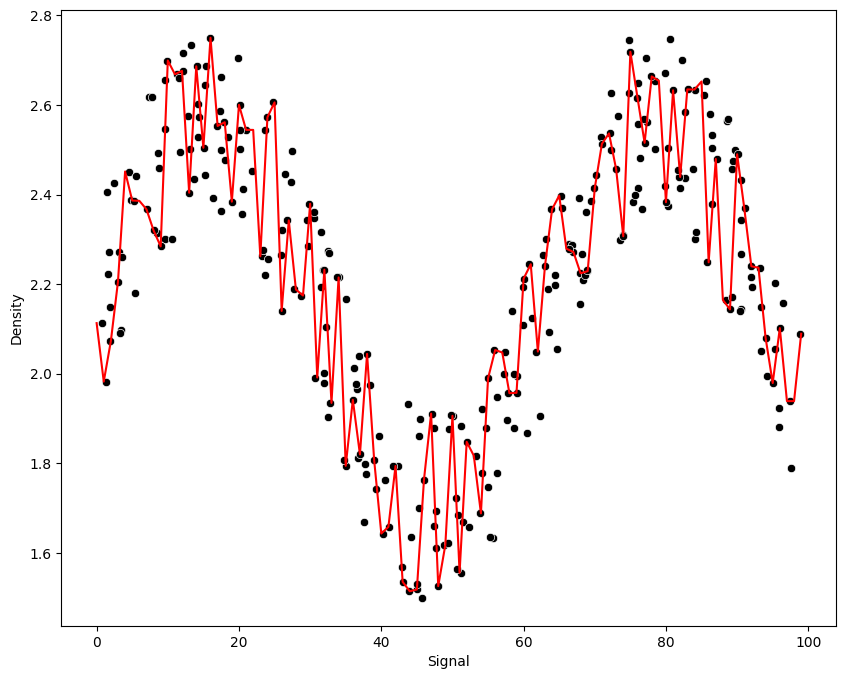

In [32]:
# let's use Descision Tree 

from sklearn.tree import DecisionTreeRegressor

model = Pipeline([
    ('scale', StandardScaler()),
    ('regr', DecisionTreeRegressor())
])
run_model(model, X_train, y_train, X_test, y_test) 

MAE: 0.10854210121349225, RMSE: 0.12646999302049064


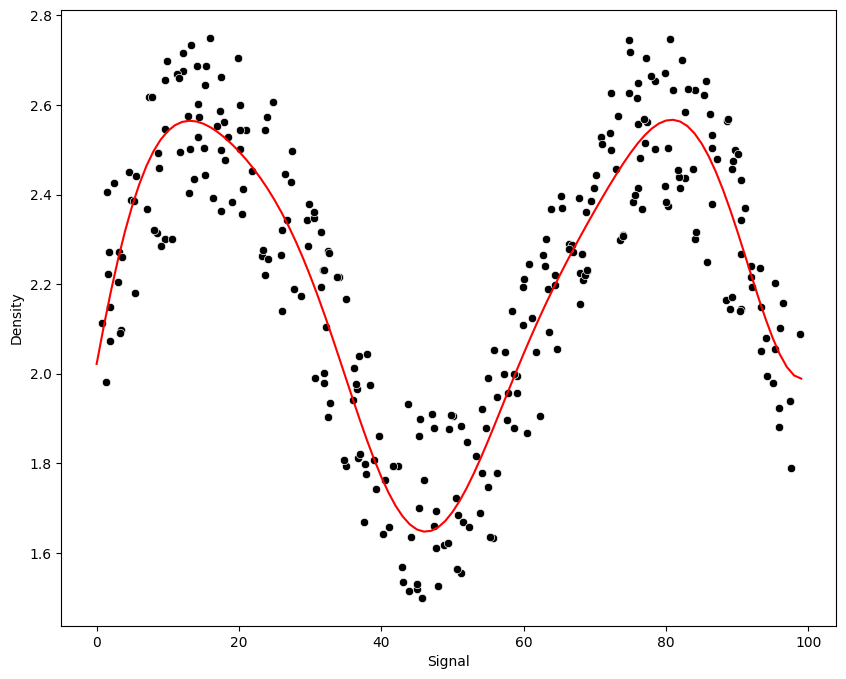

In [ ]:
# let's use SVR
# it seems that SVR is doing good

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

model = Pipeline([
    ('scale', StandardScaler()),
    ('svr', SVR())
])

param_grid = {'svr__C': [0.01, 0.1, 1, 5, 10, 1000],
              'svr__gamma': ['auto', 'scale']}

grid_model = GridSearchCV(model, param_grid, cv=5)
run_model(grid_model, X_train, y_train, X_test, y_test) 

MAE: 0.10979472938240582, RMSE: 0.13324685436161782


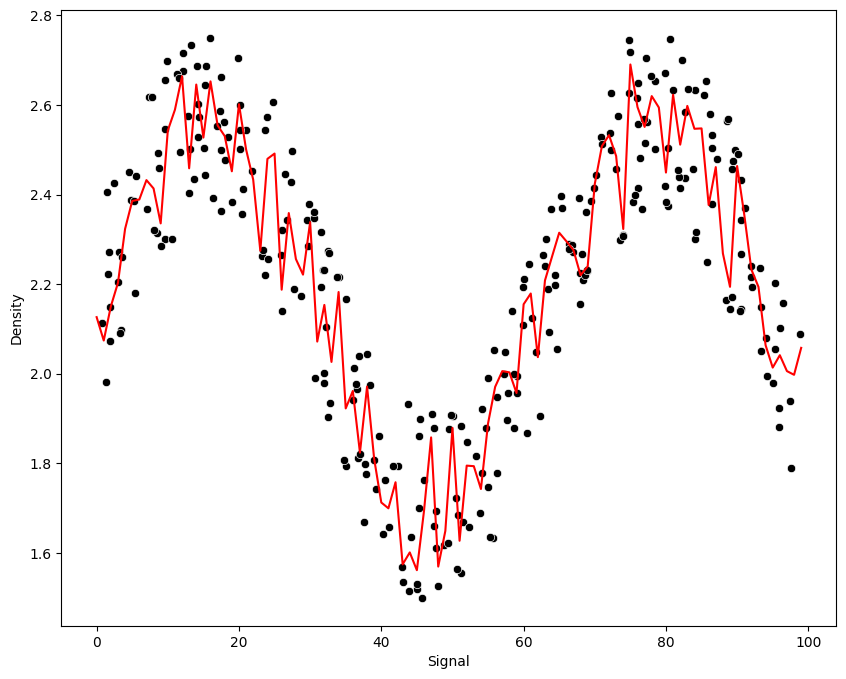

In [37]:
# random forest didn't do good either and is acting like Descion Tree

from sklearn.ensemble import RandomForestRegressor 

model = Pipeline([
    ('scale', StandardScaler()), 
    ('rf', RandomForestRegressor())
])
run_model(model, X_train, y_train, X_test, y_test) 